# Agricultural production indices

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Agricultural Index.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2014-2016...,52.9,NaN,Food and Agriculture Organization of the Unite...
1,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2014-2016...,62.7,NaN,Food and Agriculture Organization of the Unite...
2,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2014-2016...,79.3,NaN,Food and Agriculture Organization of the Unite...
3,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2014-2016...,88.9,NaN,Food and Agriculture Organization of the Unite...
4,1,"Total, all countries or areas",2015,Agricultural production (Index Base: 2014-2016...,99.9,NaN,Food and Agriculture Organization of the Unite...
...,...,...,...,...,...,...,...
3537,97,European Union (EU),2010,Food production (Index Base: 2014-2016 = 100),95.6,NaN,Food and Agriculture Organization of the Unite...
3538,97,European Union (EU),2015,Food production (Index Base: 2014-2016 = 100),100.1,NaN,Food and Agriculture Organization of the Unite...
3539,97,European Union (EU),2017,Food production (Index Base: 2014-2016 = 100),101.6,NaN,Food and Agriculture Organization of the Unite...
3540,97,European Union (EU),2018,Food production (Index Base: 2014-2016 = 100),100.0,NaN,Food and Agriculture Organization of the Unite...


In [5]:
df.shape

(3542, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  3542 non-null   int64  
 1   Unnamed: 1           3542 non-null   object 
 2   Year                 3542 non-null   int64  
 3   Series               3542 non-null   object 
 4   Value                3542 non-null   float64
 5   Footnotes            16 non-null     object 
 6   Source               3542 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 193.8+ KB


In [7]:
df.rename(
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2014-2016...,52.9,NaN,Food and Agriculture Organization of the Unite...
1,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2014-2016...,62.7,NaN,Food and Agriculture Organization of the Unite...
2,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2014-2016...,79.3,NaN,Food and Agriculture Organization of the Unite...
3,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2014-2016...,88.9,NaN,Food and Agriculture Organization of the Unite...
4,1,"Total, all countries or areas",2015,Agricultural production (Index Base: 2014-2016...,99.9,NaN,Food and Agriculture Organization of the Unite...


In [8]:
df1 = df[['Code', 'Region/Country/Area', 'Year', 'Series', 'Value']]
df1.head()

,Code,Region/Country/Area,Year,Series,Value
0,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2014-2016...,52.9
1,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2014-2016...,62.7
2,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2014-2016...,79.3
3,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2014-2016...,88.9
4,1,"Total, all countries or areas",2015,Agricultural production (Index Base: 2014-2016...,99.9


In [9]:
df1.shape

(3542, 5)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Code                 3542 non-null   int64  
 1   Region/Country/Area  3542 non-null   object 
 2   Year                 3542 non-null   int64  
 3   Series               3542 non-null   object 
 4   Value                3542 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 138.5+ KB


In [11]:
df1.describe(include='object')

,Region/Country/Area,Series
count,3542,3542
unique,227,2
top,"Total, all countries or areas",Agricultural production (Index Base: 2014-2016...
freq,16,1771


In [12]:
df1['Region/Country/Area'].value_counts()

Total, all countries or areas    16
Nauru                            16
Mali                             16
Malta                            16
Mauritania                       16
                                 ..
Belgium                          12
Montenegro                       10
Serbia                           10
Sudan                             8
South Sudan                       8
Name: Region/Country/Area, Length: 227, dtype: int64

In [13]:
df1['Series'].value_counts()

Agricultural production (Index Base: 2014-2016 = 100)    1771
Food production (Index Base: 2014-2016 = 100)            1771
Name: Series, dtype: int64

In [14]:
df1['Code'].value_counts()

1      16
520    16
466    16
470    16
478    16
       ..
56     12
499    10
688    10
729     8
728     8
Name: Code, Length: 227, dtype: int64

# Data Cleaning

In [15]:
df1['Region/Country/Area'].replace(
    {'C�te d�Ivoire': "Côte d'Ivoire"}, inplace=True)

df1['Region/Country/Area'].unique()

array(['Total, all countries or areas', 'Africa', 'Northern Africa',
       'Eastern Africa', 'Middle Africa', 'Southern Africa',
       'Western Africa', 'Americas', 'Northern America', 'Caribbean',
       'Central America', 'South America', 'Asia', 'Central Asia',
       'Eastern Asia', 'South-eastern Asia', 'Southern Asia',
       'Western Asia', 'Europe', 'Eastern Europe', 'Northern Europe',
       'Southern Europe', 'Western Europe', 'Oceania',
       'Australia and New Zealand', 'Melanesia', 'Micronesia',
       'Polynesia', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
    

In [16]:
df1.rename(
    columns={'Series': 'IndexBase'}, inplace=True
)

df1.head()

,Code,Region/Country/Area,Year,IndexBase,Value
0,1,"Total, all countries or areas",1985,Agricultural production (Index Base: 2014-2016...,52.9
1,1,"Total, all countries or areas",1995,Agricultural production (Index Base: 2014-2016...,62.7
2,1,"Total, all countries or areas",2005,Agricultural production (Index Base: 2014-2016...,79.3
3,1,"Total, all countries or areas",2010,Agricultural production (Index Base: 2014-2016...,88.9
4,1,"Total, all countries or areas",2015,Agricultural production (Index Base: 2014-2016...,99.9


In [17]:
df1['IndexBase'].replace(
    {'Agricultural production (Index Base: 2014-2016 = 100)': 'Agricultural Production',
    'Food production (Index Base: 2014-2016 = 100)': 'Food Production'}, inplace=True
)

df1.head()

,Code,Region/Country/Area,Year,IndexBase,Value
0,1,"Total, all countries or areas",1985,Agricultural Production,52.9
1,1,"Total, all countries or areas",1995,Agricultural Production,62.7
2,1,"Total, all countries or areas",2005,Agricultural Production,79.3
3,1,"Total, all countries or areas",2010,Agricultural Production,88.9
4,1,"Total, all countries or areas",2015,Agricultural Production,99.9


In [18]:
df1['Year'].value_counts()

2015    454
2017    454
2018    454
2019    454
2010    450
2005    446
1995    442
1985    388
Name: Year, dtype: int64

In [19]:
df1['Value'].describe()

count    3542.000000
mean       92.903924
std        30.887415
min        17.100000
25%        82.625000
50%        98.400000
75%       104.300000
max       653.400000
Name: Value, dtype: float64

<AxesSubplot:xlabel='Value', ylabel='Density'>

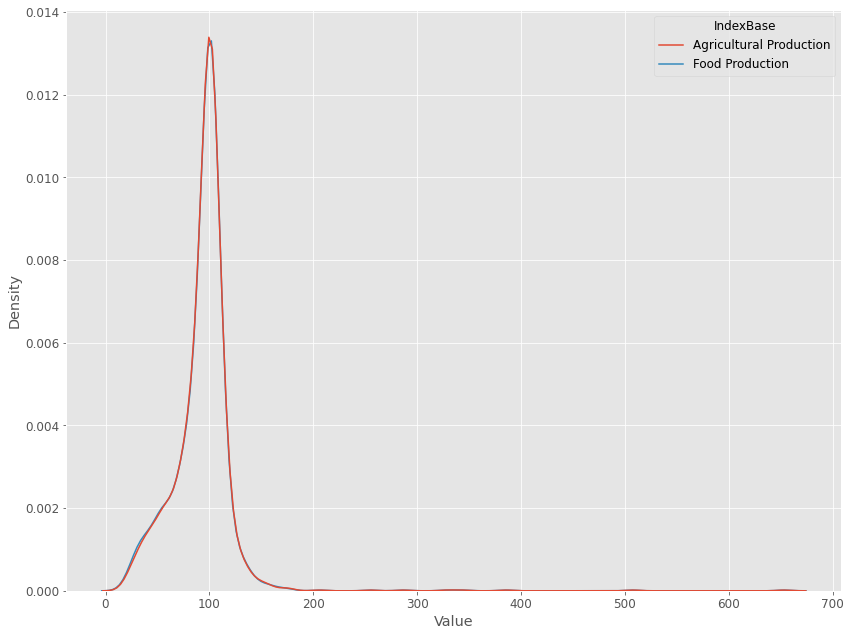

In [20]:
sns.kdeplot(data=df1, x='Value', hue='IndexBase')

# Missing Values Exploration

In [21]:
df1.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
IndexBase              0
Value                  0
dtype: int64

# Grouping and Aggregation

In [22]:
df1_grpd = df1.groupby(['Region/Country/Area', 'IndexBase'])
df1_grpd.head()

,Code,Region/Country/Area,Year,IndexBase,Value
0,1,"Total, all countries or areas",1985,Agricultural Production,52.9
1,1,"Total, all countries or areas",1995,Agricultural Production,62.7
2,1,"Total, all countries or areas",2005,Agricultural Production,79.3
3,1,"Total, all countries or areas",2010,Agricultural Production,88.9
4,1,"Total, all countries or areas",2015,Agricultural Production,99.9
...,...,...,...,...,...
3534,97,European Union (EU),1985,Food Production,94.6
3535,97,European Union (EU),1995,Food Production,92.4
3536,97,European Union (EU),2005,Food Production,95.6
3537,97,European Union (EU),2010,Food Production,95.6


# Data Visualization

In [23]:
# lineplot helper function
def plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None):
    # create figure and axis
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot bar chart
    sns.lineplot(
        data=data, 
        x=x, y=y, 
        ci=ci, hue=hue,
        size=size, style=style, 
        ax=ax)

    # label plot axes
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)

    # despine plot axes
    sns.despine(bottom=True, left=True)

    return plot_line

# Agricultural Production Exploration

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

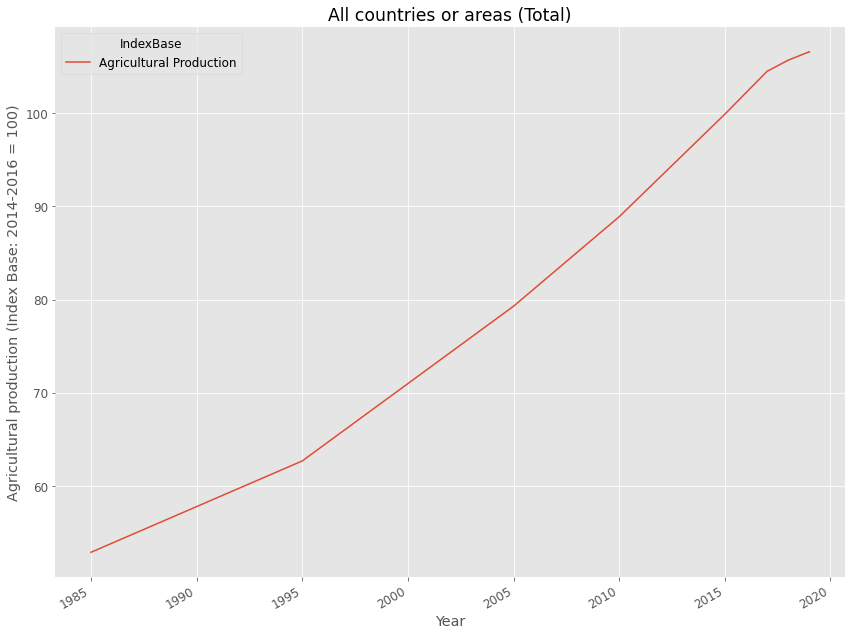

In [24]:
plot_line(
    data=df1_grpd.get_group(('Total, all countries or areas', 'Agricultural Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='All countries or areas (Total)', xlabel='Year', ylabel='Agricultural production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

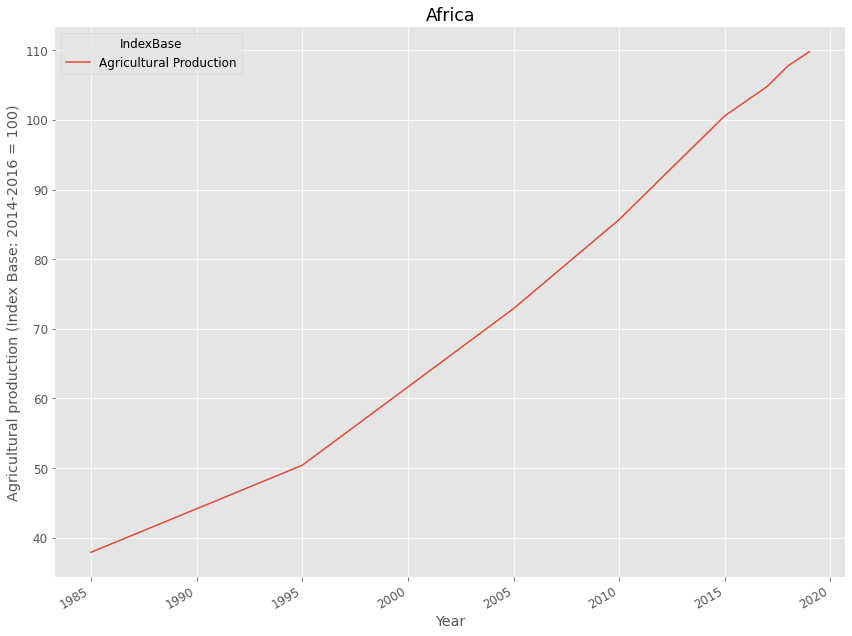

In [25]:
plot_line(
    data=df1_grpd.get_group(('Africa', 'Agricultural Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Africa', xlabel='Year', ylabel='Agricultural production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

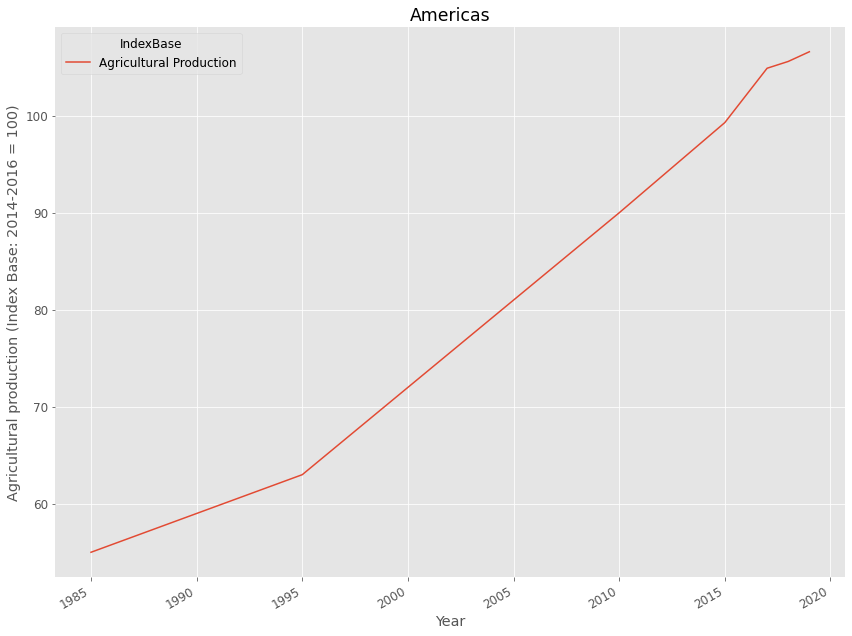

In [26]:
plot_line(
    data=df1_grpd.get_group(('Americas', 'Agricultural Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Americas', xlabel='Year', ylabel='Agricultural production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

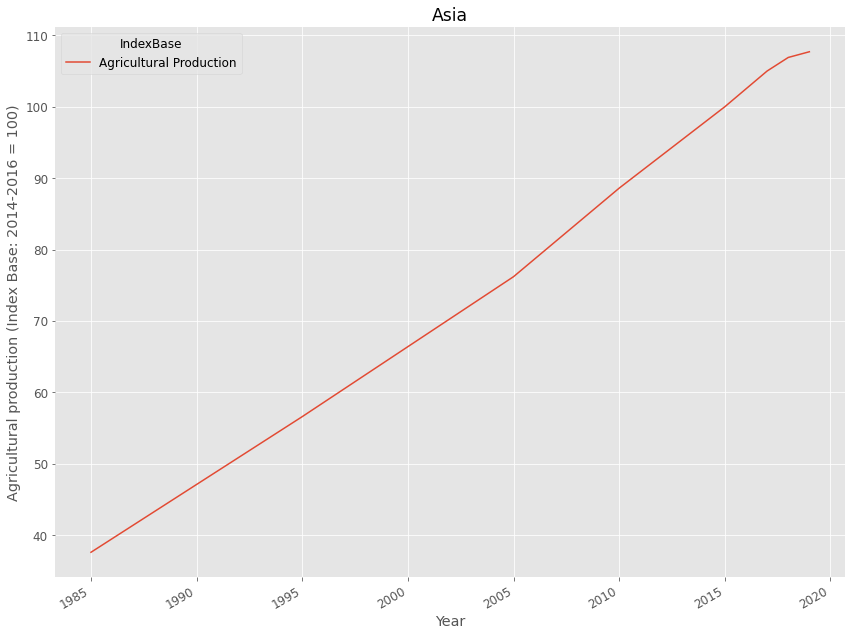

In [27]:
plot_line(
    data=df1_grpd.get_group(('Asia', 'Agricultural Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Asia', xlabel='Year', ylabel='Agricultural production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

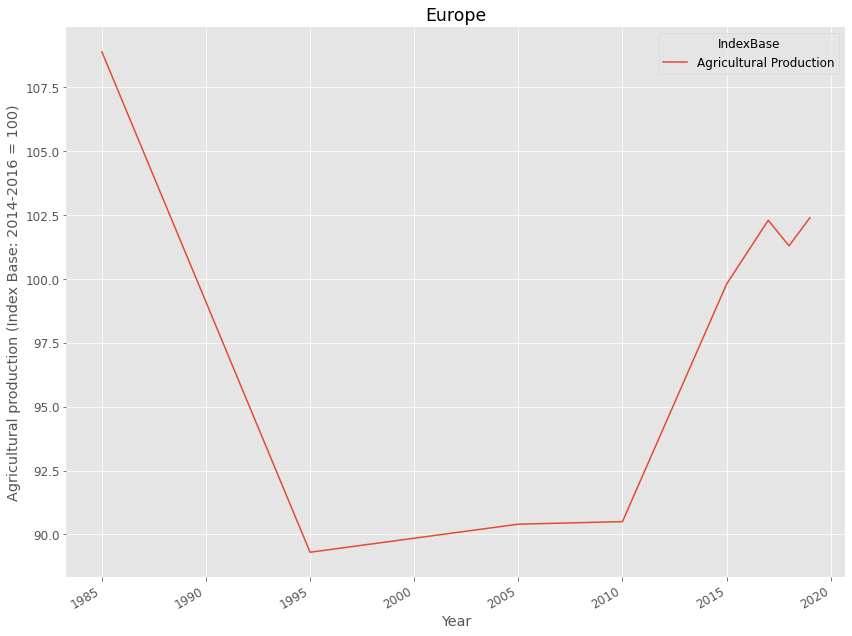

In [28]:
plot_line(
    data=df1_grpd.get_group(('Europe', 'Agricultural Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Europe', xlabel='Year', ylabel='Agricultural production (Index Base: 2014-2016 = 100)'
)

# Food production Exploration

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

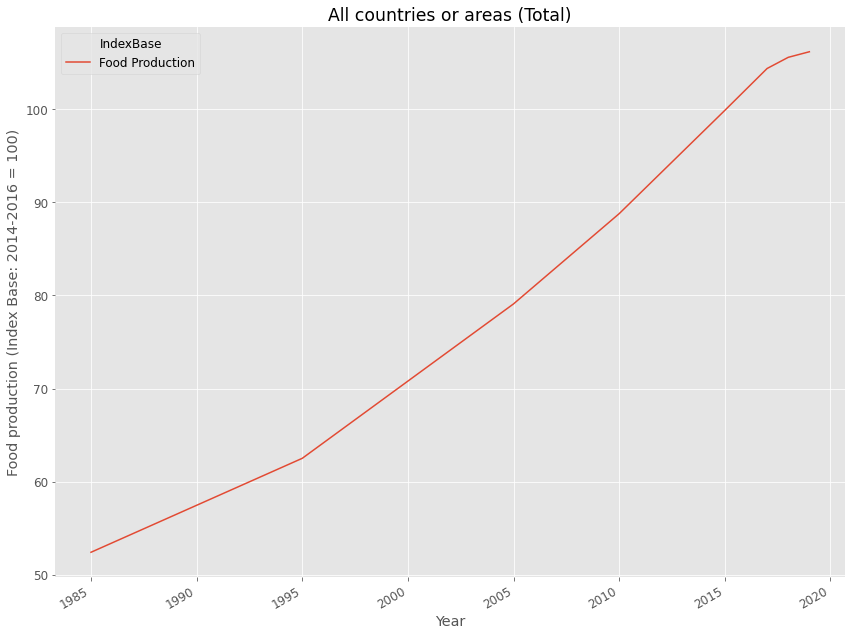

In [29]:
plot_line(
    data=df1_grpd.get_group(('Total, all countries or areas', 'Food Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='All countries or areas (Total)', xlabel='Year', ylabel='Food production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

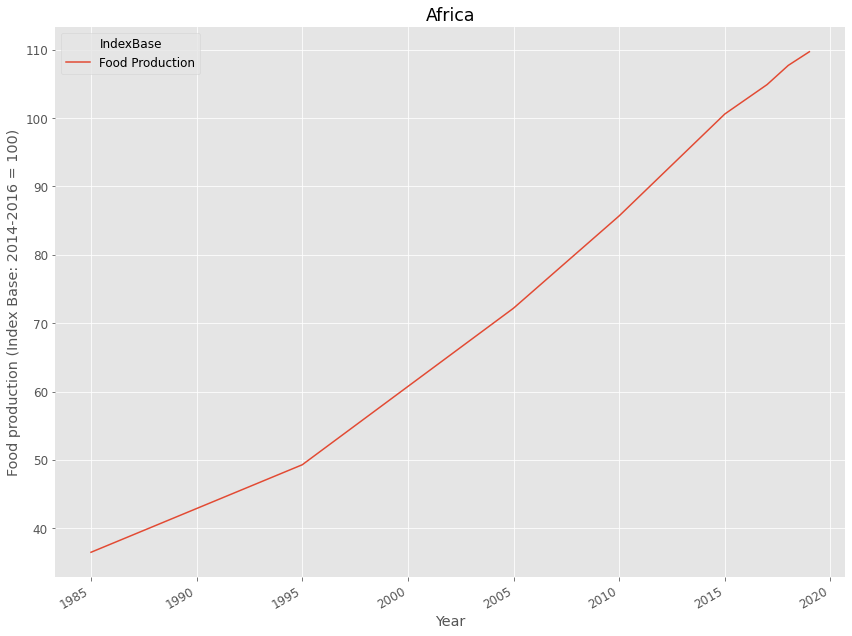

In [30]:
plot_line(
    data=df1_grpd.get_group(('Africa', 'Food Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Africa', xlabel='Year', ylabel='Food production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

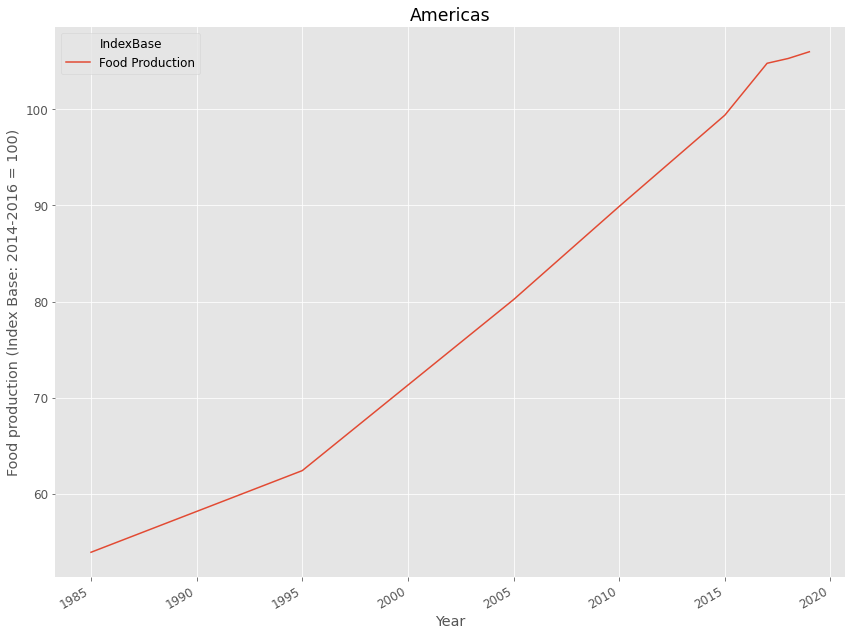

In [31]:
plot_line(
    data=df1_grpd.get_group(('Americas', 'Food Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Americas', xlabel='Year', ylabel='Food production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

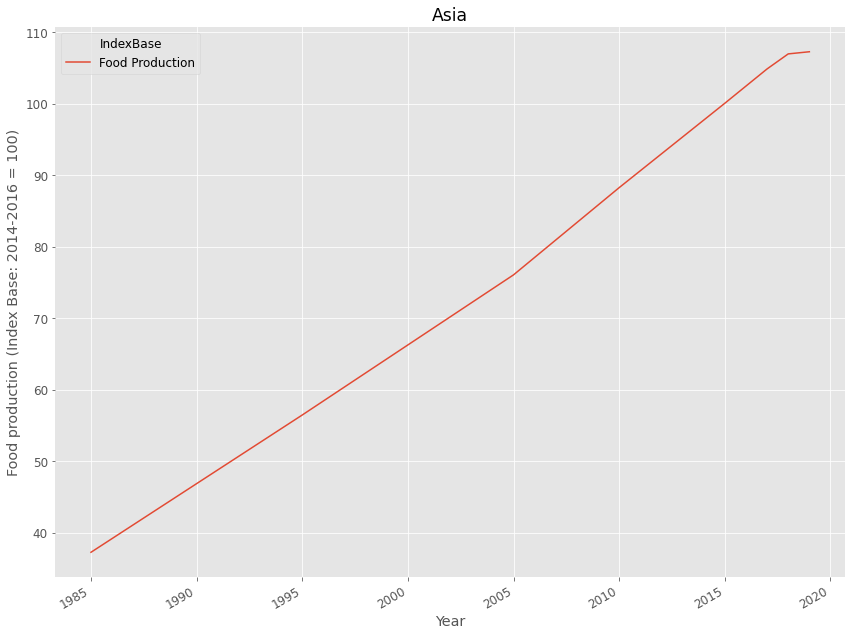

In [32]:
plot_line(
    data=df1_grpd.get_group(('Asia', 'Food Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Asia', xlabel='Year', ylabel='Food production (Index Base: 2014-2016 = 100)'
)

<function __main__.plot_line(data, x, y, ci=None, hue=None, size=None, style=None, ax=None, title=None, xlabel=None, ylabel=None)>

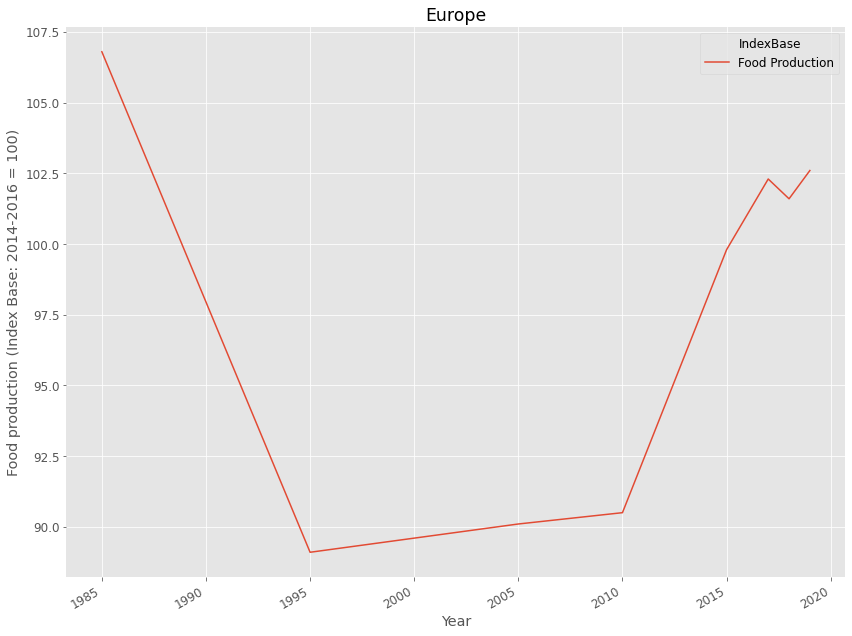

In [33]:
plot_line(
    data=df1_grpd.get_group(('Europe', 'Food Production')),
    x='Year', y='Value',
    hue='IndexBase',
    title='Europe', xlabel='Year', ylabel='Food production (Index Base: 2014-2016 = 100)'
)